# Project description


You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)<br>
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Table of contents:

1. [Open the data file and study the general information](#Step-1.-Open-the-data-file-and-study-the-general-information)
2. [Prepare the data](#Step-2.-Prepare-the-data)
3. [Analyze the data](#Step-3.-Analyze-the-data)
4. [Create a user profile for each region](#Step-4.-Create-a-user-profile-for-each-region)
5. [Test the hypotheses](#Step-5.-Test-the-following-hypotheses:)
6. [Write a general conclusion](#Step-6.-Write-a-general-conclusion)

In [2]:
# libraries cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns
from scipy import stats as st

## Step 1. Open the data file and study the general information

In [3]:
try: # locally
    df_games = pd.read_csv('datasets/games.csv')
except: # globally
    df_games = pd.read_csv('/datasets/games.csv')

In [4]:
# take a look

print(df_games.info())

df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### <font color = 'blue'>Notes:</font>

* I have total of 11 columns, 4 of them are categorical and all the rest are numerical.
* All column names have to be converted to lowercase.
* 6 columns have missing values, I will decide what to do with them after examining them closer.
* 'Year' and 'critic score' columns to be converted to 'int' type, while 'user_score' seems to need to be converted to 'float'.
<br><br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [5]:
# get description for numeric columns
df_games.describe().round(2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [6]:
# get description for object columns:

df_games.describe(include = object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


#### <font color = 'blue'>Notes:</font>

Seemingly, many games don't have sales at all. My theory is that we are talking about older games - especially since year of release column lowest values start at 1980.

There are 11559 unique game names out of 16713. Since I know that many games are released on multiple platform, most probably the games with duplicated names are multiplatform ones.

Also now I see why 'user_score' is an object column: it has a 'tbd' value, which is also the most frequent. If I want to properly analyze this column, I have to find a way to replace those values to numerical one (or just separate games which have 'user_score' into another dataframe).
<br><br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

## Step 2. Prepare the data

* Replace the column names (make them lowercase).
* Convert the data to the required types.
* Describe the columns where the data types have been changed and why.
* If necessary, decide how to deal with missing values:
    * Explain why you filled in the missing values as you did or why you decided to leave them blank.
    * Why do you think the values are missing? Give possible reasons.
    * Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
* Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [7]:
# rename the columns:
df_games.rename(columns = str.lower, inplace = True)

# check the result
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Missing values

In [8]:
# check missing values in 'name' and 'genre':
df_games[df_games.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# One of those games have sales, but I don't have any way to know what game are we talking about. 
# Since we are talking about two rows only, I prefer to drop them:

df_games = df_games[df_games.name.notna()]
df_games.name.isnull().sum()

0

In [10]:
# check missing year of release cells:

print('Total missing values in year of release: ', df_games.year_of_release.isna().sum())
print('Share of missing values in year_of_release: ', round(df_games.year_of_release.isna().sum() / len(df_games), 4))

df_games[df_games.year_of_release.isnull()].head()

Total missing values in year of release:  269
Share of missing values in year_of_release:  0.0161


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [11]:
# check if some game names which don't have year of release appear in dataset more than once
df_games[df_games.year_of_release.isnull() & df_games.name.duplicated()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M


In [12]:
# check some examples: do I have year of release for some of those games on another platform?

df_games.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


#### <font color = 'blue'>Notes - year of release column:</font>

Only 1.6% of data is missing, but if I can save some rows and fill in the missing data - why not?

In the first few rows of dataset filtered by empty year values I can see that for some reason (possibly an error while collecting the data) some of the years included in game names.

Also part of the game names that don't have year looks to be multiplatform, so I can check year of release on another platform and fill where it's missing.

So I am going to  sort out game years in both of those cases, and then check again how many missing year values do I have.
<br><br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [13]:
# create function for extracting values from multiplatform games into dictionary:
def to_dictionary(nan_column):
    dictionary = {}
    global df_games
    
    # names of the games with nan parameter in specified column:
    nan_names = df_games[df_games[nan_column].isna()].name
    
    # iterate through rows with nan_names and check for values in specified column:
    for name in df_games[df_games.name.duplicated()].query('name in @nan_names').name:
        # create set for storing column's unique values:
        col_set = set({})
        # fill in the set:
        for value in df_games[df_games['name'] == name][nan_column]:
            # condition to ignore nan values:
            if value == value:
                col_set.add(value)
                
        # add set's value to dictionary as a list:
        dictionary[name] = list(col_set)
    return dictionary

In [14]:
years_multiplatform = to_dictionary('year_of_release')

# go trough game names in dictionary one by one
for item in years_multiplatform:    
    # some games could have more than one year of release on different platforms
    # so I create condition to select only games with one year value:
    if len(years_multiplatform[item]) == 1:
        df_games[df_games['name'] == item] = df_games[df_games['name'] == item].fillna(
            {'year_of_release' : years_multiplatform[item][0]})

In [15]:
# check how many empy year values I have now:
df_games.year_of_release.isnull().sum()

158

In [16]:
# dictionary for storing years that appear in game names
year_in_name = {}

# list of years (1980-2016), converted to strings:
years = [str(x) for x in list(range(1980,2017))]

# fill in the dictionary
for name in df_games.query('year_of_release != year_of_release').name:
    for year in years:
        if year in name:
            year_in_name[name] = float(year)
            
# fill missing years based on years that appear in game's names:
for item in year_in_name:
    df_games[df_games['name'] == item] = df_games[df_games['name'] == item].fillna({'year_of_release' : year_in_name[item]})

In [17]:
# check how many empy year values out of total I have now:
round(df_games.year_of_release.isnull().sum() / len(df_games), 4)

0.0089

In [18]:
# I have less than 1% of empty year values that I don't have a way to fill. I prefer to drop them:
df_games.dropna(subset = ['year_of_release'], inplace = True)

# check the result
df_games.year_of_release.isnull().sum()

0

In [19]:
# check missing critic scores:

print('Total missing values in critic score: ', df_games.critic_score.isna().sum())
print('Share of missing values in critic score: ', round(df_games.critic_score.isna().sum() / len(df_games), 4))

Total missing values in critic score:  8491
Share of missing values in critic score:  0.5126


In [20]:
# check for missing multiplatform games critic reviews - maybe it will be possible to fill at least some of the na's:
print('Amount of multiplatform games with no critic score:',
      len(df_games[df_games.name.duplicated()].query('critic_score != critic_score')))

df_games[df_games.name.duplicated()].query('critic_score != critic_score').head()

Amount of multiplatform games with no critic score: 1892


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN
157,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN
167,Super Mario World,GBA,2001.0,Platform,3.21,1.11,0.95,0.20,NaN,NaN,NaN
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN


In [21]:
# try and fill empty critic score values based on average critic score for this game on all platforms

# create dictionary with function:
c_score_dict = to_dictionary('critic_score')

# go through dictionary and fill in the average scores by game name
for key in c_score_dict:
    values = []
    for value in c_score_dict[key]:
        if value > 0:
            values.append(value)
    if len(values) > 0:
        df_games[df_games['name'] == key] = df_games[df_games['name'] == key].fillna({'critic_score' : mean(values)})

In [22]:
# check how many missing values left in this column:
print('Total missing values in critic score: ', df_games.critic_score.isna().sum())
print('Share of missing values in critic score: ', round(df_games.critic_score.isna().sum() / len(df_games), 4))

Total missing values in critic score:  7531
Share of missing values in critic score:  0.4547


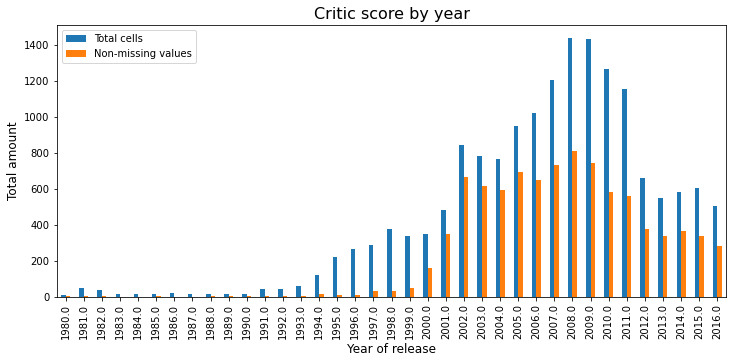

In [23]:
# check distribution of critic review values by year
round(df_games.groupby('year_of_release')[['name', 'critic_score']].agg({'name':'count', 'critic_score':'count'}), 2
     ).plot(kind = 'bar', figsize = (12,5))
plt.title('Critic score by year', fontsize=16)
plt.ylabel('Total amount', fontsize=12)
plt.xlabel('Year of release', fontsize=12)
plt.legend(['Total cells', 'Non-missing values'])
plt.show()

In [24]:
# convert missing critic scores to -5:
df_games['critic_score'] = df_games['critic_score'].fillna(-5).astype('float')

# check if there are missing scores left
df_games.critic_score.isna().sum()

0

#### <font color = 'blue'>Notes - critic scores column:</font>

More than half of values in 'critic score' were missing, so I couldn't just drop them. I tried to fill them by average score for game on different platforms, but most of the games, apparently, didn't have critic score on all platforms, so I managed to reduce amount of missing values only by few percents.

I cannot know why those values are missing, though my assumption is that some of the games weren't assessed by critics at all, and for some such a value wasn't available in online sources: for example, most of the games released before 2000 don't have any critic review values, and then most of the reviews were publicated in offline gaming magazines.

I filled empty values with '-5' to be able to use those cells further.
<br><br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [25]:
# check 'tbd' values:
print('Total "tbd" values: ', df_games.query('user_score == "tbd"').user_score.count())
print('Share of "tbd" values ', round(df_games.query('user_score == "tbd"').user_score.count() / len(df_games), 4))

Total "tbd" values:  2392
Share of "tbd" values  0.1444


In [26]:
# check missing user scores:

print('Total missing values in user score: ', df_games.user_score.isna().sum())
print('Share of missing values in user score: ', round(df_games.user_score.isna().sum() / len(df_games), 4))

Total missing values in user score:  6633
Share of missing values in user score:  0.4004


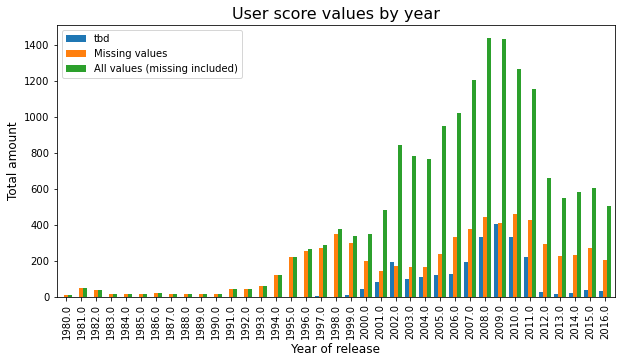

In [27]:
# group 'tbd' user score values and empty user score values by year of release
tbd_values = df_games.query('user_score == "tbd"').groupby('year_of_release').user_score.count()
nan_user_scores = df_games.user_score.isnull().groupby(df_games.year_of_release).sum()
total_game_count = df_games.groupby('year_of_release').name.count()

# plot distribution bar
pd.concat([tbd_values, nan_user_scores, total_game_count], axis = 1).plot(kind = 'bar', figsize = (10,5), width = 0.8)
plt.title('User score values by year', fontsize=16)
plt.ylabel('Total amount', fontsize=12)
plt.xlabel('Year of release', fontsize=12)
plt.legend(['tbd', 'Missing values', 'All values (missing included)'])
plt.show()

#### <font color = 'blue'>Notes - user scores column:</font>

As in critic scores, I see that until year 2000 most of the values are missing. In years range 2000-2011 amounts of missing and tbd values are quiet close. From 2012 year ratio of tbd's to missing values is much lower. 

Missing values most probably appear for games that didn't have user scores at all (older games, possibly for older platforms). I cannot assume 'tbd' values origin, maybe this dataset was provided as incomplete and it was intended to fill in the values later. Anyway, I don't see a way to fill in those 'tbd' values except for treat them as NaN's. Also I won't be able to convert this column if I have those values.

I will replace both 'tbd' and NaN values with -5 to be able to use those cells further.
<br><br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [28]:
df_games.user_score.replace({'tbd':np.nan}, inplace = True)

# check for updated missing user scores:
print('Total missing values in user score: ', df_games.user_score.isna().sum())
print('Share of missing values in user score: ', round(df_games.user_score.isna().sum() / len(df_games), 4))

Total missing values in user score:  9025
Share of missing values in user score:  0.5449


In [29]:
# create dictionary with function:
u_score_dict = to_dictionary('user_score')

# go through dictionary and fill in the average scores by game name
for key in u_score_dict:
    values = []
    for value in u_score_dict[key]:
        if value == value:
            values.append(float(value))
    if len(values) > 0:
        df_games[df_games['name'] == key] = df_games[df_games['name'] == key].fillna({'user_score' : mean(values)})
        
# fill in the missing values with -5:
df_games.user_score = df_games.user_score.fillna(-5).astype('float')
        
# check the result:
print('Total missing values in user score: ', df_games.user_score.isna().sum())
print('Share of missing values in user score: ', round(df_games.user_score.isna().sum() / len(df_games), 4))

Total missing values in user score:  0
Share of missing values in user score:  0.0


In [30]:
# check rating column:
print('Total missing values in rating:', df_games.rating.isna().sum())
print('Share of missing values inrating: ', round(df_games.rating.isna().sum() / len(df_games), 4))
df_games.rating.value_counts()

Total missing values in rating: 6700
Share of missing values inrating:  0.4045


E       3957
T       2929
M       1553
E10+    1411
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [31]:
# try and fill whatever I can by game name:
rating_dict = to_dictionary('rating')

for item in rating_dict:    
    # some games could have different ratings on different platforms
    # so I create condition to select only games with one rating value:
    if len(rating_dict[item]) == 1:
        df_games[df_games['name'] == item] = df_games[df_games['name'] == item].fillna(
            {'rating' : rating_dict[item][0]})
        
# fill remaining missing values with 'unknown':
df_games.rating = df_games.rating.fillna('unknown')
        
# check the result:
print('Total missing values in rating:', df_games.rating.isna().sum())
print('Share of missing values in rating: ', round(df_games.rating.isna().sum() / len(df_games), 4))

Total missing values in rating: 0
Share of missing values in rating:  0.0


In [32]:
# check for duplicates:
df_games.duplicated().sum()

0

In [33]:
# convert column types:
df_games.year_of_release = df_games.year_of_release.astype('int16')

# list for float columns:
float_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

df_games[float_cols] = df_games[float_cols].astype('float32')


In [34]:
# add 'total_sales' column:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1).astype('float32')

# check final table info:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16564 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16564 non-null  object 
 1   platform         16564 non-null  object 
 2   year_of_release  16564 non-null  int16  
 3   genre            16564 non-null  object 
 4   na_sales         16564 non-null  float32
 5   eu_sales         16564 non-null  float32
 6   jp_sales         16564 non-null  float32
 7   other_sales      16564 non-null  float32
 8   critic_score     16564 non-null  float32
 9   user_score       16564 non-null  float32
 10  rating           16564 non-null  object 
 11  total_sales      16564 non-null  float32
dtypes: float32(7), int16(1), object(4)
memory usage: 1.6+ MB


#### <font color = 'blue'>Student notes:</font>

Since I still have many user and critic scores missing, I may also try and fill them based on each other:

In [35]:
# check ratio between mean user and critic scores:

# overall mean
print(df_games.query('user_score != -5').user_score.mean() / df_games.query('critic_score != -5').critic_score.mean())

# mean by platform
df_games.query('user_score != -5').groupby('platform').user_score.mean() / df_games.query('critic_score != -5').groupby('platform').critic_score.mean()

0.103070743088987


platform
2600    0.109258
3DS     0.100149
DC      0.098341
DS      0.109130
GB      0.107267
GBA     0.112552
GC      0.108722
GEN     0.098603
N64     0.106633
NES     0.110862
PC      0.093388
PS      0.109347
PS2     0.110688
PS3     0.095399
PS4     0.093554
PSP     0.105948
PSV     0.103603
SAT     0.102721
SNES    0.107095
Wii     0.106174
WiiU    0.098663
X360    0.096729
XB      0.107110
XOne    0.089513
dtype: float32

In [36]:
# means by platform do vary a little, so I prefer to try and fill by platform

# save user-critic ratios by platform to dictionary:
user_critic_ratio = dict(df_games.query('user_score != -5').groupby('platform').user_score.mean() / 
                         df_games.query('critic_score != -5').groupby('platform').critic_score.mean())

In [37]:
# function to fill in missing user scores:
def uscore_from_cscore(row):
    
    user_score = row.user_score
    critic_score = row.critic_score
    platform = row.platform
    
    # condition to process only rows with existing critic scores and nan user scores:
    if user_score == -5 and critic_score != -5:
        return round(critic_score * user_critic_ratio[platform], 2).astype('float32')
    else:
        return user_score

In [38]:
# function to fill in missing critic scores:
def cscore_from_uscore(row):
    
    user_score = row.user_score
    critic_score = row.critic_score
    platform = row.platform
    
    # condition to process only rows with existing critic scores and nan user scores:
    if user_score != -5 and critic_score == -5:
        return round(user_score * user_critic_ratio[platform], 2).astype('float32')
    else:
        return critic_score

In [39]:
# apply function to user score column:
df_games.user_score = df_games.apply(uscore_from_cscore, axis = 1)

# apply function to critic score column:
df_games.critic_score = df_games.apply(cscore_from_uscore, axis = 1)

In [40]:
# check how many missing values remained in those columns 
# (since there should be the same number, I'm checking only one of them):

print(len(df_games.query('user_score == -5')))
print(round(len(df_games.query('user_score == -5')) / len(df_games), 2))

7197
0.43


#### <font color = 'blue'>Notes: Step 2 - summary</font>

This set has quite a lot of missing values most of which I don't see a way to fill in.  I see two main reasons for the values to miss:
 * Since the data came from open sources, some of values were simply missing, especially for older games or vintage platforms, but probably not only them. There can be variety of reasons: too old game, too new game, too unpopular game, no such values (like critic scores) for these games on some sources and so on.
 * There was some error in combining the data from different sources, probably in different formats, to one unified dataset. For example, on different sites user and critic scores could be measured differently, maybe even not in numeric values.
 
 For some of the games I filled in the missing values by values found for the same game on another platform, but it worked for relatively small part of the dataset. Also I managet to fill in part of user and critic scores based on each other. For all the other missing values, I decided to leave them as it is and bear in mind to filter them out or maybe make slice without them when a need to perform an analysis based on those specific columns will emerge. Rows with missing years I decided to drop, because there was very small amount of those.
 
 
Except for missing values, there was no major problems in this dataset. I renamed the columns, converted data types, checked for duplicates (there were none) and added column with total sales with sum of sales from all regions.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

## Step 3. Analyze the data

### Task: 
Look at how many games were released in different years. Is the data for every period significant?

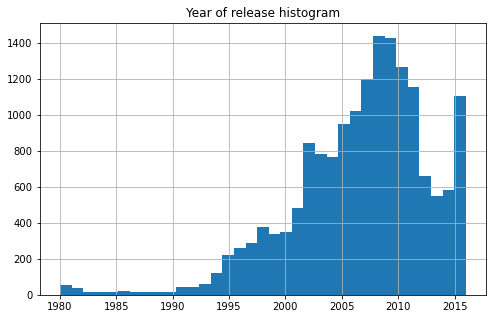

In [41]:
# plot histogram for 'years' column:
df_games.year_of_release.hist(bins = 35, figsize = (8,5))
plt.title('Year of release histogram')
plt.show()

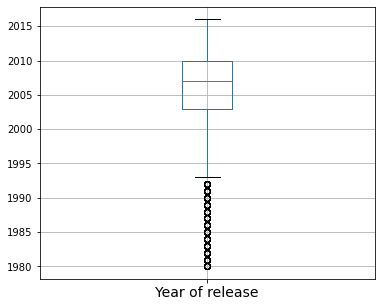

In [42]:
# check the boxplot for outliers
df_games.boxplot('year_of_release', figsize = (6,5))
plt.xticks([1],['Year of release'], fontsize = 14)
plt.show()

#### <font color = 'blue'>Notes:</font>

Most of the values seem to be concentrated between 2000 and 2016 years, with newly produced games per year rate dropping between 2012-2015, and with high peak of newly released games in 2016. 

There is a relatively small amount of games released before 1993, and, according to boxplot, they should be considered outliers.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

### Task:
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?


In [43]:
# look what platforms have greatest total sales
df_games.groupby('platform').total_sales.sum().sort_values(ascending = False).head(15)

platform
PS2     1249.719971
X360     966.669983
PS3      934.709961
Wii      903.309998
DS       804.280029
PS       727.580017
PS4      314.140015
GBA      313.730011
PSP      293.570007
PC       258.859985
3DS      258.510010
XB       254.639999
GB       254.429993
NES      251.050003
N64      218.479996
Name: total_sales, dtype: float32

In [44]:
# create slice with top sales platforms:
top_sales_plat = df_games.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "PC"]')

# create pivot table counting values for each platform by years:
top_platform_lifespan = top_sales_plat[['platform', 'year_of_release', 'name']].pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count'
)
top_platform_lifespan.head()

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,2.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN


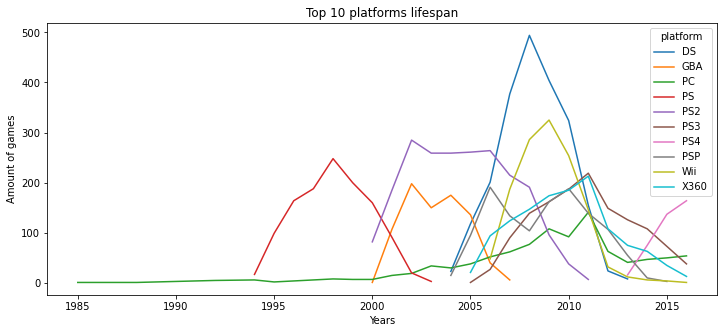

In [45]:
# plot graph showing lifespan of different platforms:
top_platform_lifespan.plot(figsize = (12,5))
plt.ylabel('Amount of games')
plt.xlabel('Years')
plt.title('Top 10 platforms lifespan')
plt.show()

In [46]:
# show platform lifespan (equals to amount of non-null values for each platform)
top_platform_lifespan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1985 to 2016
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DS      11 non-null     float64
 1   GBA     8 non-null      float64
 2   PC      26 non-null     float64
 3   PS      10 non-null     float64
 4   PS2     12 non-null     float64
 5   PS3     12 non-null     float64
 6   PS4     4 non-null      float64
 7   PSP     12 non-null     float64
 8   Wii     11 non-null     float64
 9   X360    12 non-null     float64
dtypes: float64(10)
memory usage: 2.2 KB


In [47]:
# calculate average lifespan:
top_platform_lifespan.count().mean()

11.8

#### <font color = 'blue'>Notes:</font>

For this task I selected 10 platforms with highest total sales. Their average lifespan equals 11.8 years. Out of those, 4 platforms no longer have new games released in 2016. Other 4 platforms, while having very large total sales, are also dropping in popularity - though, there are still games being released for them in 2016. PS4 games started to be released only recently, but they are continuing to rice. Most steady platform is (predictably) PC, which had games released for all the accounting period.

### Task:
Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

Work only with the data that you've decided is relevant. Disregard the data for previous years.


#### <font color = 'blue'>Notes:</font>

According to boxplot, outliers start around year 1993. As I see from top games lineplot, game release for 8 out of 10 most profitable platforms started after 2000. If I am going take into account average game lifespan, it would be most reasonable to disregard all the data before 2004. 

But if I want to include only latest generation platform, I have to choose only data after 2014.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [48]:
df_games = df_games.query('year_of_release > 2010')

### Task:
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.


In [49]:
# check profits and amount of games on platforms that remained in updated dataset:

round(df_games.groupby('platform').total_sales.agg(['sum', 'count']).sort_values('sum', ascending = False).T, 1)

platform,PS3,X360,PS4,3DS,XOne,PC,Wii,WiiU,PSV,DS,PSP,PS2
sum,447.7,382.8,314.1,258.2,159.3,98.7,96.4,82.2,53.8,39.5,29.5,0.4
count,713.0,507.0,392.0,513.0,247.0,396.0,201.0,147.0,429.0,187.0,314.0,7.0


In [50]:
# prepare pivot table for line plot to check how sales for platforms changed over years:
sales_by_year = df_games[['year_of_release', 'platform', 'total_sales']].pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')

sales_by_year

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.199997,26.33,35.160000,0.45,157.979996,NaN,17.82,4.630000,59.790001,NaN,145.279999,NaN
2012,51.760002,11.67,23.450001,NaN,108.279999,NaN,7.95,16.190001,22.940001,17.559999,100.720001,NaN
2013,56.570000,1.54,13.010000,NaN,113.250000,25.990000,3.38,10.590000,8.590000,21.650000,88.580002,18.960001
2014,43.759998,NaN,13.280001,NaN,47.759998,100.000000,0.24,11.900000,3.750000,22.030001,34.740002,54.070000
2015,27.780001,NaN,8.520000,NaN,16.820000,118.900002,0.12,6.250000,1.140000,16.350000,11.960000,60.139999
2016,15.140000,NaN,5.250000,NaN,3.600000,69.250000,NaN,4.250000,0.180000,4.600000,1.520000,26.150000


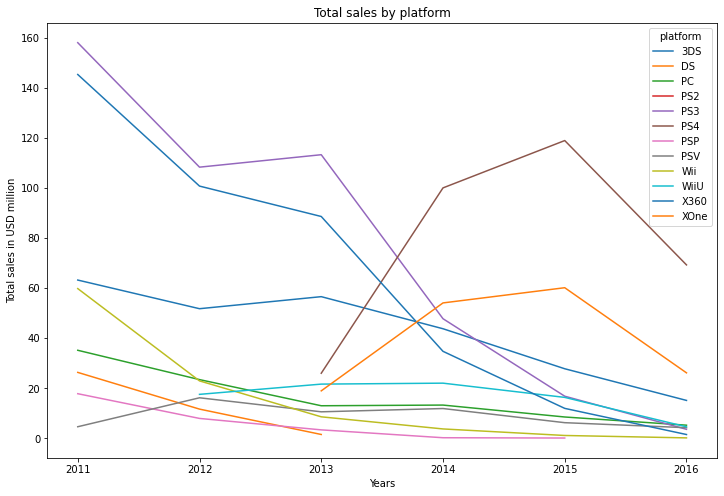

In [51]:
# plot a line graph:
sales_by_year.plot(figsize = (12,8))
plt.ylabel('Total sales in USD million')
plt.xlabel('Years')
plt.title('Total sales by platform')
plt.show()

#### <font color = 'blue'>Notes:</font>

* In 2016 it looks like all the sales are dropping, but I believe that since data was collected during 2016, it was incomplete (maybe for 2-3 first quarters of the year), so sales in 2016 cannot represent current market situation accurately.
* Up to 2015 there are two platforms on the rise: PS4 and XOne. Those two definintely look very promising
* 3DS, WiiU and PSV's sales are in decline, but it's relatively small if we compare their 2015 sales to their peak sales in last years. Also WiiU and PSV's sales are small overall, compared to big platforms like PS and Xbox series.
* X360, PS3 and Wii had great profits, but now they are in rapid decline, supposedly because users a switching to newer generation platforms.
* DS and PSP don't have new games released anymore, but DS was very popular with high sales peak.
* Although it is in low decline, PC is the steadiest platform and it doesn't expected to lose it's sales anytime soon. 


**Conclusion**:

I believe that the most promising platforms are:
 - PS4 and XOne because their sales are currently on the rise
 - 3DS and WiiU - though they are in decline, but relatively small, and their 2015 sales are over 15 million. I am not including PS3 because it is  on rapid fall while it's successor PS4 gaining more popularity.
 - PC, because judging on previous years tendencies, it's sales are not expected to drop as dramatically as other platforms which are losing their popularity, and I expect it to be in top 5 (or maybe 6, but to me it looks like to bet on PC is less of a risk than on PS3 anyway).
 
 <br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [52]:
# create a list of top 5 platforms:
top5plat = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']

### Task:

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

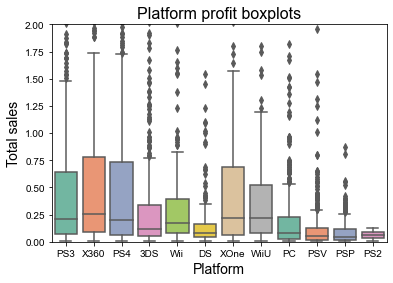

In [53]:
# make boxplots for total_sales in global set
sns.boxplot(x = df_games 
            .platform, y = df_games.total_sales, palette = 'Set2') 
sns.set(rc = {'figure.figsize':(12,5)}) 
plt.title('Platform profit boxplots', fontsize = 16) 
plt.ylim(0,2)
plt.ylabel('Total sales', fontsize = 14) 
plt.xlabel('Platform', fontsize = 14) 
plt.show()

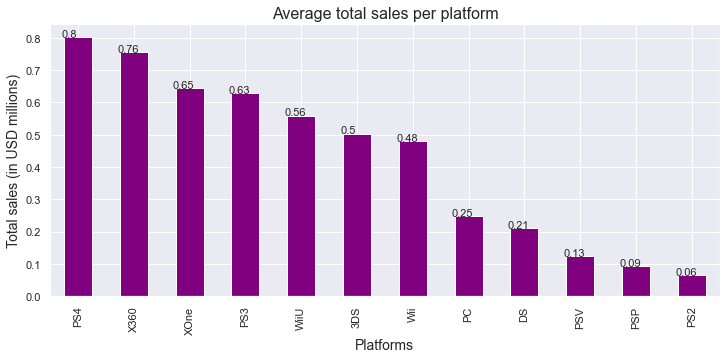

In [54]:
# group total sales by platform and calculate means, then plot a bar chart for the values:
df_games.groupby('platform').total_sales.agg('mean').sort_values(ascending = False).plot(kind = 'bar', color = 'purple')
plt.title('Average total sales per platform', fontsize = 16)
plt.xlabel('Platforms', fontsize = 14)
plt.ylabel('Total sales (in USD millions)', fontsize = 14)

for i, (x, y) in enumerate(df_games.groupby('platform').total_sales.agg('mean').sort_values(ascending = False)
                           .to_dict().items()): plt.text(i-.3, y, s=str(round(y, 2)), fontsize=11)
    
plt.show()


#### <font color = 'blue'>Notes:</font>

It looks like sales data is mostly very variated, and many values can be considered as outliers. 

One of the older platforms with relatively low yearly sales (GB) doesn't have outliers. I believe the reason is that most of this platform values were cut off when I filtered out data and only years above 2000 have been left. Because of little outliers, this platform also looks to have highest mean and median values, which contradicts total sales per platform breaked down by year. Almost the same could be said about boxplot of three other platforms which don't have outliers: their data is very particular, and therefore cannot be relied on (and also all those platforms are too outdated for us to consider them seriously).

As to other platforms, mostly the results confirm results I achieved in previous steps: all the big and popular platforms like PS, Wii and Xbox series have the largest amounted sales - both by upper limits of boxplots and by averages. And those platform's sales look mostly similar.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

### Task:
Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [55]:
# look at the correlations:
df_games.query('platform == "3DS"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.150377,0.111842
critic_score,0.150377,1.000000,0.944179
user_score,0.111842,0.944179,1.000000


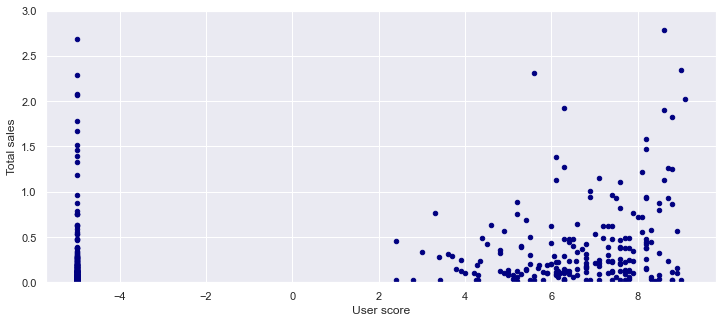

In [56]:
df_games.query("platform == '3DS'").plot(kind='scatter', x='user_score', y='total_sales', color = 'navy')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.ylim(0,3)

plt.show()

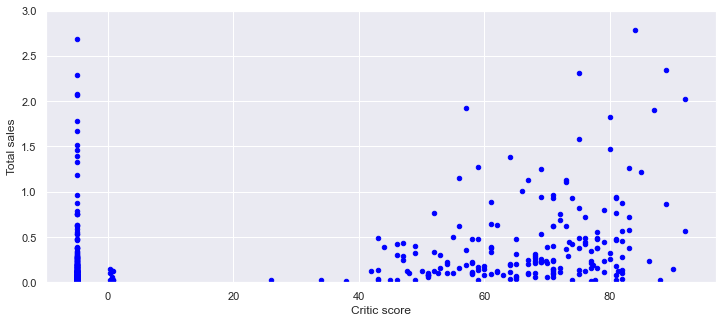

In [57]:
df_games.query("platform == '3DS'").plot(kind='scatter', x='critic_score', y='total_sales', color='blue')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.ylim(0,3)
plt.show()

#### <font color = 'blue'>Notes:</font>
Both user and critic scores have weak, but definitely existing positive correlation with total sales, which is roughly the same for both - around 0.25.

Because of few single outliers I set ylim in both scatterplots to $ 3 mil, so I could zoom into main concentration of data.

While user scores are scattered more evenly (and correlation is slightly weaker), critic scores are more concentrated around high values.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

### Task:
Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [58]:
# separate dataset with needed platforms only
scatterplots1 = df_games.query("platform == @top5plat")

# include column of standartized critic scores (divided by 10)
# so it will be possible to place them on the same scatterplot as user scores
scatterplots1['critic_score2'] = scatterplots1['critic_score'] / 10

<ipython-input-58-e3dfe191f6fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatterplots1['critic_score2'] = scatterplots1['critic_score'] / 10


In [59]:
# print correlations:
for platform in top5plat:
    print('Correlation matrix for', platform)
    print()
    print(scatterplots1.query("platform == @platform")[['total_sales', 'user_score', 'critic_score']].corr())
    print()
    print('====================')
    print()

Correlation matrix for PS4

              total_sales  user_score  critic_score
total_sales      1.000000    0.103333      0.215988
user_score       0.103333    1.000000      0.933819
critic_score     0.215988    0.933819      1.000000


Correlation matrix for XOne

              total_sales  user_score  critic_score
total_sales      1.000000    0.030998      0.192638
user_score       0.030998    1.000000      0.884082
critic_score     0.192638    0.884082      1.000000


Correlation matrix for 3DS

              total_sales  user_score  critic_score
total_sales      1.000000    0.111842      0.150377
user_score       0.111842    1.000000      0.944179
critic_score     0.150377    0.944179      1.000000


Correlation matrix for WiiU

              total_sales  user_score  critic_score
total_sales      1.000000    0.198608      0.247568
user_score       0.198608    1.000000      0.926866
critic_score     0.247568    0.926866      1.000000


Correlation matrix for PC

              total

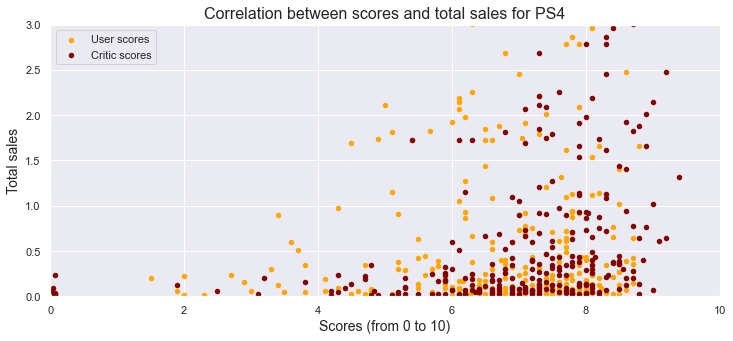

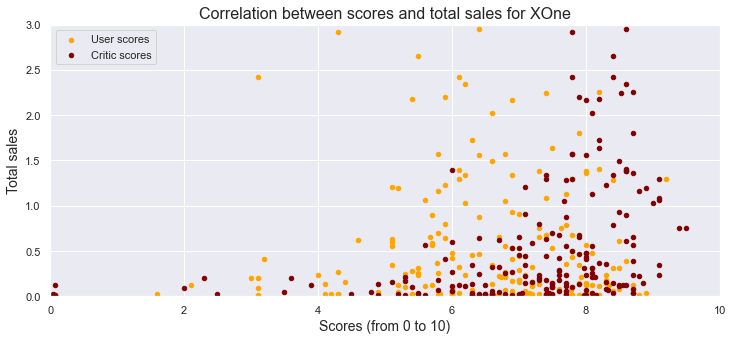

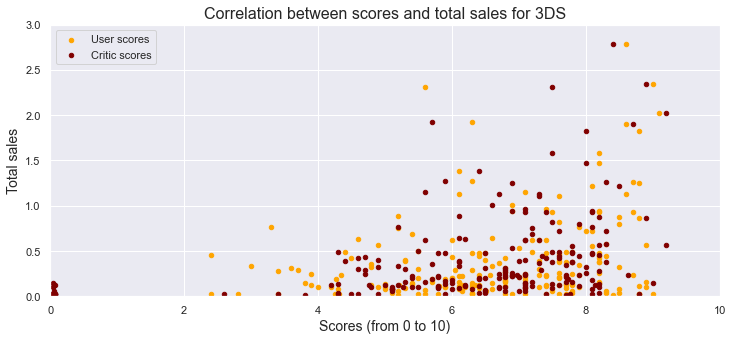

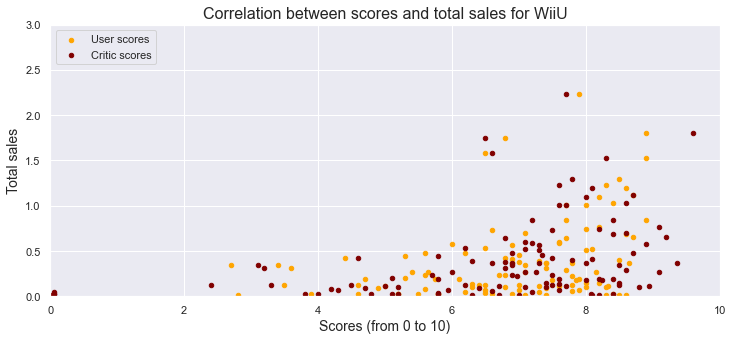

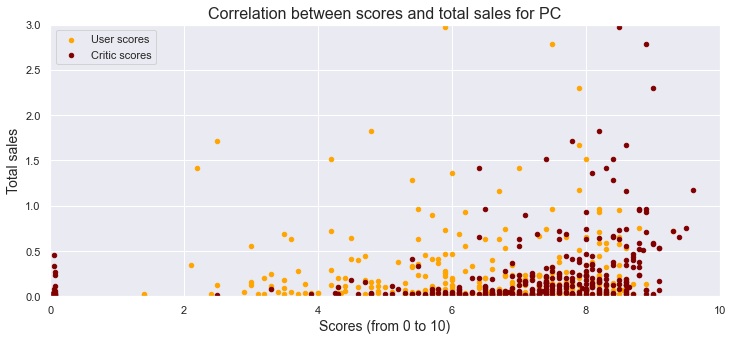

In [60]:
# create scatterplots via loop:
for platform in top5plat:
    ax1 = scatterplots1.query("platform == @platform").plot(
        kind='scatter', x='user_score', y='total_sales', color='orange', label = 'User scores')
    ax2 = scatterplots1.query("platform == @platform").plot(
        kind='scatter', x='critic_score2', y='total_sales', color='maroon', label = 'Critic scores', ax=ax1)
    plt.title('Correlation between scores and total sales for {}'.format(platform), fontsize = 16)
    plt.xlabel('Scores (from 0 to 10)', fontsize = 14)
    plt.ylabel('Total sales', fontsize = 14)
    plt.legend(loc = 'upper left')
    plt.ylim(0,3)
    plt.xlim(0,10) # exclude -5 values
    plt.show()

#### <font color = 'blue'>Notes:</font>

Though correlations between platforms do vary (some have correlation between user scores and sales close to zero, and for one platform have a slightly stronger correlation than critic scores), the overall trend is that scores do positively correlated with sales, and that critic scores have  slightly higher correlation than user scores.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

### Task:
Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

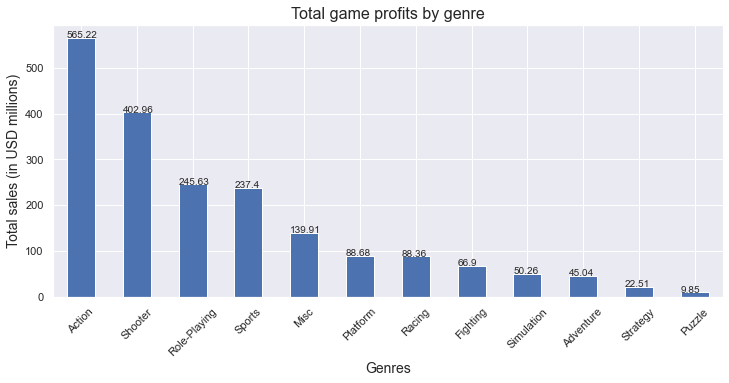

In [61]:
# group main dataset by genre and look at profits:
df_games.groupby('genre').total_sales.agg('sum').sort_values(ascending = False).plot(kind = 'bar', rot = 45)
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('Total sales (in USD millions)', fontsize = 14)
plt.title('Total game profits by genre', fontsize = 16)

for i, (x, y) in enumerate(df_games.groupby('genre').total_sales.agg('sum').sort_values(ascending = False).to_dict().items()):
    plt.text(i-.25, y, s=str(round(y, 2)), fontsize=10)
    
plt.show()

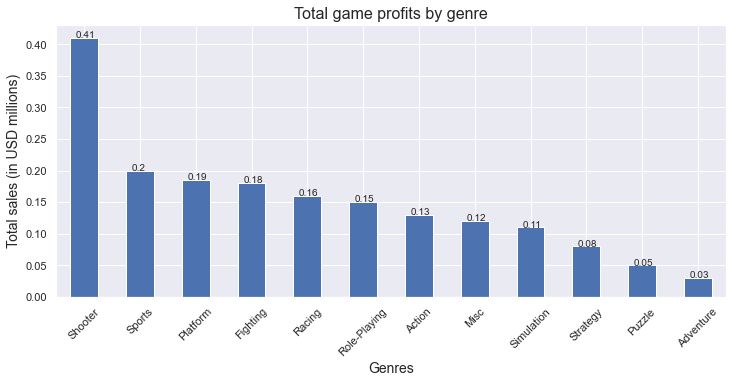

In [62]:
# look at average profits per genre:

# group main dataset by genre and look at profits:
df_games.groupby('genre').total_sales.agg('median').sort_values(ascending = False).plot(kind = 'bar', rot = 45, figsize = (12,5))
plt.xlabel('Genres', fontsize = 14)
plt.ylabel('Total sales (in USD millions)', fontsize = 14)
plt.title('Total game profits by genre', fontsize = 16)

for i, (x, y) in enumerate(df_games.groupby('genre').total_sales.agg('median').sort_values(ascending = False).to_dict().items()):
    plt.text(i-.15, y, s=str(round(y, 2)), fontsize=10)
    
plt.show()

#### <font color = 'blue'>Notes:</font>

There are 5 games with total sales over $ 100 mil: Action, Shooter, RPG, Sports and Misc. 

But have some doubts about 'Misc' - usually it's a general category which includes wide range of very different game with very little common basis. So I also want to take into account average sales per game by platform. 

By this criteria, the top 5 genres are: Shooter, Sports, Platform, Fighting, Racing. But I also have my doubts about 'Racing', it has very low total sales. 

So I choose next platforms:
* Action, Sports and Shooter - because they are in top 5 by both criteria.
* Platform and RPG - because they appear in top 6 by both criteria.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [63]:
# create a list for top 5 genres:
top5gen = ['Action', 'Sports', 'Shooter', 'RPG', 'Platform']

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:
* The top five platforms. Describe variations in their market shares from region to region.
* The top five genres. Explain the difference.
* Do ESRB ratings affect sales in individual regions?

In [64]:
# calculate market shares by region for top platforms
df_games.query('platform == @top5plat').groupby('platform')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].agg('sum')

,na_sales,jp_sales,eu_sales,other_sales
platform,,,,
3DS,82.830002,100.620003,61.459999,13.300000
PC,30.080000,0.000000,57.380001,11.210000
PS4,108.739998,15.960000,141.089996,48.349998
WiiU,38.099998,13.010000,25.129999,5.950000
XOne,93.120003,0.340000,51.590000,14.270000


===== MARKET SHARES BY PLATFORM =====


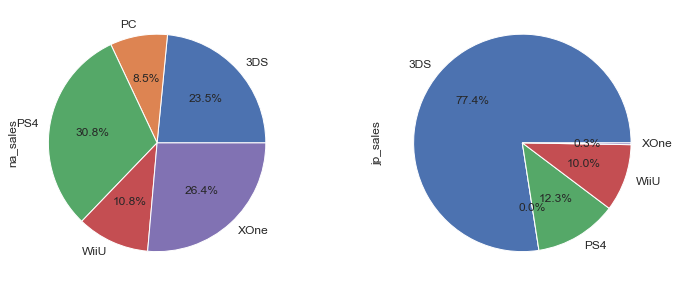

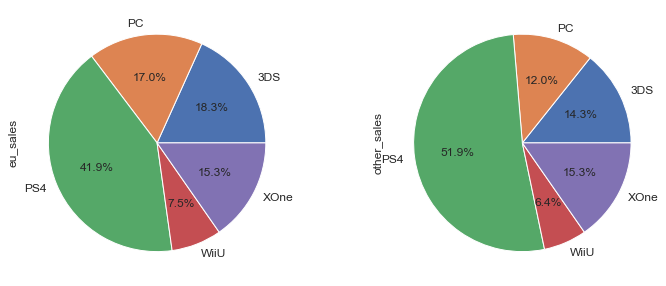

In [65]:
print('===== MARKET SHARES BY PLATFORM =====')
# create pie plot for market shares of top 5 platforms
for region in [['na_sales', 'jp_sales'], ['eu_sales', 'other_sales']]:
    # plot a pie chart
    df_games.query('platform == @top5plat').groupby('platform')[region].agg('sum').plot(
        kind = 'pie', subplots = True, fontsize = 12,  autopct='%1.1f%%', legend = False)
    plt.show()

#### <font color = 'blue'>Notes:</font>
* US: PS4 is preferred by majority of users, then comes XOne and 3DS, all three with roughly similar shares of market.
* Eu: most of the users (over 40%) prefer PS4, with 3DS and PC as the next choices.
* Jp: There is one main popular platform there - 3DS (with 77.4% share of market), other shares are small to insignificantly small.
* Other regions: PS4 takes more than half of the market, with XOne and 3DS as the next choices.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [66]:
# calculate market shares by region for top genres
df_games.query('genre == @top5gen').groupby('genre')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].agg('sum')

,na_sales,jp_sales,eu_sales,other_sales
genre,,,,
Action,234.410004,63.630001,202.169998,65.010002
Platform,38.279999,12.130000,30.070000,8.200000
Shooter,194.449997,11.920000,148.050003,48.540001
Sports,108.699997,11.090000,88.669998,28.940001


===== MARKET SHARES BY GENRE =====


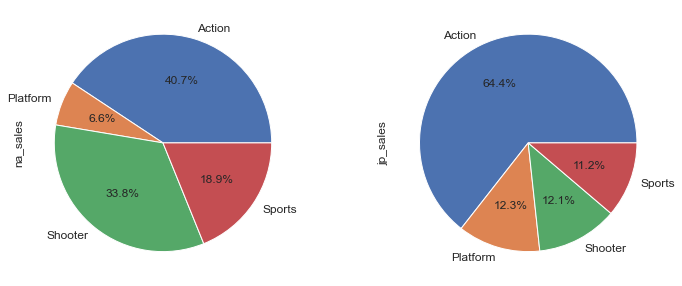

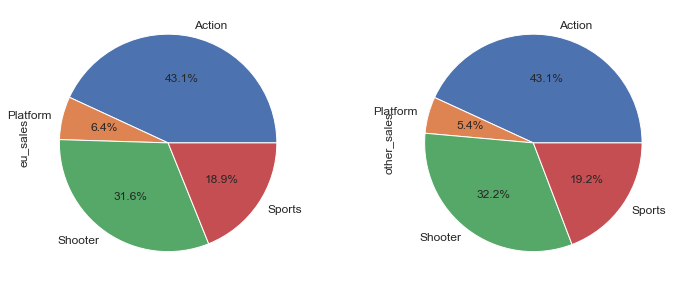

In [67]:
print('===== MARKET SHARES BY GENRE =====')
# create pie plot for market shares of top 5 genres
for region in [['na_sales', 'jp_sales'], ['eu_sales', 'other_sales']]:
    # plot a pie chart
    df_games.query('genre == @top5gen').groupby('genre')[region].agg('sum').plot(
        kind = 'pie', subplots = True, fontsize = 12,  autopct='%1.1f%%', legend = False)
    plt.show()

#### <font color = 'blue'>Notes:</font>

* JP: More than 60% prefer Action, with Sport taking second place by popularity (23.2%). Unlike other regions, shooters are much less popular here, while platform games are twice as popular as everywhere else.
* US, EU and other regions: genre preferences are almost the same for everyone, with roughly 40% of the users preferring Action, with Shooters in the second place with roughly 30%.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

In [68]:
# calculate market shares by region for different ESRB ratings
df_games.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].agg('sum')

,na_sales,jp_sales,eu_sales,other_sales
rating,,,,
E,174.100006,37.619999,144.550003,41.700001
E10+,122.089996,11.610000,82.430000,25.100000
EC,0.420000,0.000000,0.000000,0.030000
M,320.000000,27.840000,263.450012,86.070000
RP,0.000000,0.000000,0.030000,0.010000
T,114.500000,39.060001,86.599998,29.330000
unknown,102.480003,129.779999,96.260002,27.660000


===== MARKET SHARES BY RATING =====


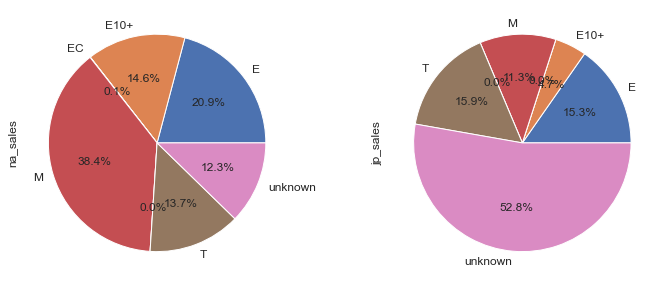

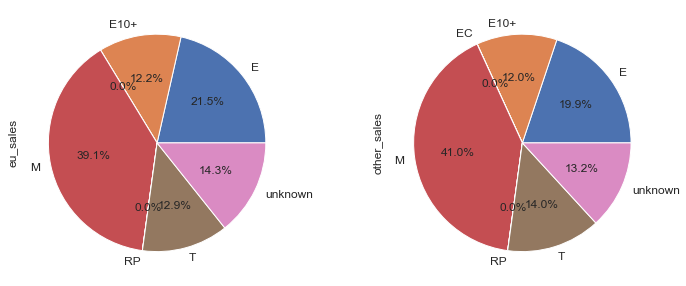

In [69]:
print('===== MARKET SHARES BY RATING =====')
# create pie plot for market shares of different ESRB ratings
for region in [['na_sales', 'jp_sales'], ['eu_sales', 'other_sales']]:
    # plot a pie chart
    df_games.groupby('rating')[region].agg('sum').plot(
        kind = 'pie', subplots = True, fontsize = 12,  autopct='%1.1f%%', legend = False)
    plt.show()

#### <font color = 'blue'>Notes:</font>

Shares of game sales by rating look quite similar in all regions, with some differences mainly in JP, where:
* Share of games with Unknown rating is more than 50%.
* M rating is much less popular than everywhere else.
* Games with T and E ratings shares are similar to those of other regions.

#### <font color = 'blue'>Conclusion: user profiles</font>

* US: Average user prefers PS4 platform with XOne and 3DS as second choices, and plays mostly Action and Shooter games with M rating.

* EU: Average user prefers PS4 platform with XOne and 3DS as second choices, and plays mostly Action and Shooter games with M rating.

* JP: Average user prefers 3DS platform, and plays mostly Action games with no rating.

* Other regions: Average user prefers PS4 platform with XOne and 3DS as second choices, and plays mostly Action and Shooter games with M rating.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

## Step 5. Test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

#### <font color = 'blue'>Null hypothesis (H0) 1:  Average user ratings of the Xbox One and PC platforms are the same.</font>
**Alternate hypothesis (H1) 1: Average user ratings of the Xbox One and PC platforms are not the same**

In [70]:
# prepare datasets:
user_ratings_xone = df_games.query('platform == "XOne"').user_score
user_ratings_pc = df_games.query('platform == "PC"').user_score

In [71]:
# I expect variances not to differ too much, but still I prefer to check them
np.var(user_ratings_xone) / np.var(user_ratings_pc)

0.8836369751742399

In [72]:
# calculate pvalue
pvalue1 = st.ttest_ind(user_ratings_xone, user_ratings_pc, equal_var = True).pvalue

# check null hypothesis:
alpha1 = 0.05
if pvalue1 > alpha1:
    print(
        'The hypothesis cannot be rejected. There is not enough evidence to determine that the user scores for both platforms are not the same.')
else:
    print('Reject H0. Average user scores of XOne and PC platforms are not equal.')

The hypothesis cannot be rejected. There is not enough evidence to determine that the user scores for both platforms are not the same.


#### <font color = 'blue'>Null hypothesis (H0) 1:  Average user ratings of the Action and Sports genres are the same.</font>
**Alternate hypothesis (H1) 1: Average user ratings of the Action and Sports genres are not the same**

In [73]:
# prepare datasets:
user_ratings_action = df_games.query('genre == "Action"').user_score
user_ratings_sports = df_games.query('genre == "Sports"').user_score

In [74]:
# check variances
np.var(user_ratings_xone) / np.var(user_ratings_pc)

0.8836369751742399

In [75]:
# calculate pvalue
pvalue2 = st.ttest_ind(user_ratings_action, user_ratings_sports, equal_var = True).pvalue

# check null hypothesis:
alpha2 = 0.05
if pvalue2 > alpha2:
    print(
        'The hypothesis cannot be rejected. There is not enough evidence to determine that the user scores for both platforms are not the same.')
else:
    print('Reject H0. Average user scores of XOne and PC platforms are not equal.')

Reject H0. Average user scores of XOne and PC platforms are not equal.


### Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

#### <font color = 'blue'>Student answer:</font>
1. For both hypotheses I formulated null hypothesis as positive statement (as if the hypothesis is true and the datasets are the same), and alternative hypothesis that states that values are NOT equal. In both cases the null hypotheses were rejected and I had to accept the alternative ones.


2. I chose significance level of 0.05, mostly because it is the main standard and I didn't see any reason to change it.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)

## Step 6. Write a general conclusion

#### Project overview

In this project I had to analyze data on game sales in different regions and to identify patterns that determine whether the game succeeds or not.

Since the dataset was collected from different open sources and some of the data is rather old and incomplete, in preprocessing step I had to deal with large amount of missing values. I managed to fill some of them based on same or close values by specific game name, but not all of them.

While analyzing the data, I selected only the relevant years range based on average game's lifespan, and selected 5 most profitable games and platforms. Later, I used this data for creating user profile by region.

In the last step I tested two hypotheses to check if user ratings are the same for two different platforms and for two different genres. There was not enough evidence to accept those hypotheses.

#### Final conclusions:
 
Based on my findings, the following atributes are inherent to the most successful games:

* Region - there are some differences in user profiles in regions (mainly in platform preferences), so each region has to have it's own marketing strategy, promoting games for different platforms. For example, while PS4 is popular almost everywhere, vast majority of japan users prefer 3DS - and to contrary, while there is significant demand for XOne and PC games everywhere else, share of JP users on those platforms is close to 0. 

    For all markets except Japan, I also separated second most preferred platform which is 3DS.


* Platforms - some platforms are more profitable than other. Aside from popularity, platform's profits also depend on it's age: the closer platform's age to average platform's lifespan, the larger the sales. That's how I selected top 5 most profitable platforms and that's why I believe it's important to pay attention to second most profitable platforms per region. While PS4 only starts to rise in sales and it's selection of newly released game isn't in it's peak yet, the 3DS platform, while being very popular in the past and it's sales expected to drop in the next years, also isn't in it's lowest amount of sales yet. In Europe I also can note stable demand for PC games which - according to sales graphs - isn't expected to drop too much. 


* User and Critic scores are positively correlated with games' total sales, and it's quite rational: there is a wide selection of games of different genres and ratings for each platform, and most users will prefer to choose games to buy by their ratings and reviews, both of critics and of fellow users. It looks like user reviews are not the same for most popular platforms and for most popular genres, so it is important to take ratings of the game into account when deciding which games to promote.


* Genres and ratings - in all regions most popular genre is Action, and everywhere except Japan the most popular rating is M.

So, based on all this, our average most successful game is action game with M rating, with high reviews. Platform vary from region to region: in JP it would be 3DS, while in other areas it would be PS4.

<br><br>
[^^^ Back to the Table of Contents ^^^](#Table-of-contents:)